In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

In [270]:
file_path='E:/Metro2/raw_data//'
df=pd.read_csv(file_path+'Metro survey no 2 post-processed data (03-05-2024) 203 samples.csv')

In [271]:
# in all the columns if there is the character ( then ignore the text from it
for column in df.select_dtypes(include='object').columns:
    # Apply the transformation to each entry in the column
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [272]:
df['8'].value_counts()

8
Metro                    168
Bus + Metro               19
Metro + Bus               12
Bus + metro + metro        1
Bus1 + Metro + Bus2        1
Bus + metro1 + metro2      1
Railway+metro              1
Name: count, dtype: int64

In [273]:
df.head(2)

,Timestamp,Start time of survey,1,2,2c,2d,3,4,5,6,...,19,20,21,22a,22b,22c,22d,23,24,25
0,01-05-2024 08:28,8:28:00 AM,Tulasi,Metro station,Konanakunte Cross,Banashankari,Banashakari temple,Social/Religious place,Gottigere government school near,Home,...,Trade/Diploma Certificate,Employed Private,"25,001 – 50,000",0,1,0,0,"No, I will not use a bicycle.",Need to carry things or travelling with someone.,NaN
1,01-05-2024 08:36,8:30:00 AM,Tulasi,Inside Metro train,Konanakunte Cross,Jayaprakash Nagar,Sidalingeshwara theatre near,Work/Business place,Jambusavari dine 2nd cross,Home,...,Graduate,Employed Private,"25,001 – 50,000",1,2,0,0,Current travelling conditions with no special ...,NaN,NaN


In [274]:
df.isna().sum()

Timestamp                 0
Start time of survey      0
1                         0
2                         0
2c                        0
2d                        0
3                         0
4                         0
5                         0
6                         0
7                         0
8                         0
9                         0
10                        0
10a                       0
10b                       0
10c                       0
11                        0
11a                       0
11b                       0
11c                     158
12a                       0
12b                       0
12c(a)                    0
12c(b)                    0
12c(c)                    0
12c(d)                    0
12c(e)                    0
13a                     168
13b                     168
14                        0
15                        0
16                        0
17                        0
17a                     181
17b                 

### Income not reported

In [275]:
# print the unique values of column 1 where column 21 is NA or null
print(df[df['21'].isna()]['1'].unique())

['Vasundhara N ' 'Vasundhara N' 'Sneha']


In [276]:
df['1'].unique()

array(['Tulasi ', 'Vasundhara N ', 'Vasundhara N', 'Tulasi NS ', 'Tulasi',
       'Keerthi M ', 'Varad ', 'Varad Verma ', 'Varad Verm ',
       'Varad. Verma ', 'Sneha', 'Varad Verma', 'Varad verma', 'Sneha '],
      dtype=object)

In [277]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

print(df['1'].unique(),df.shape[0])

['Tulasi' 'Vasundhara N' 'Keerthi M ' 'varad' 'Sneha'] 203


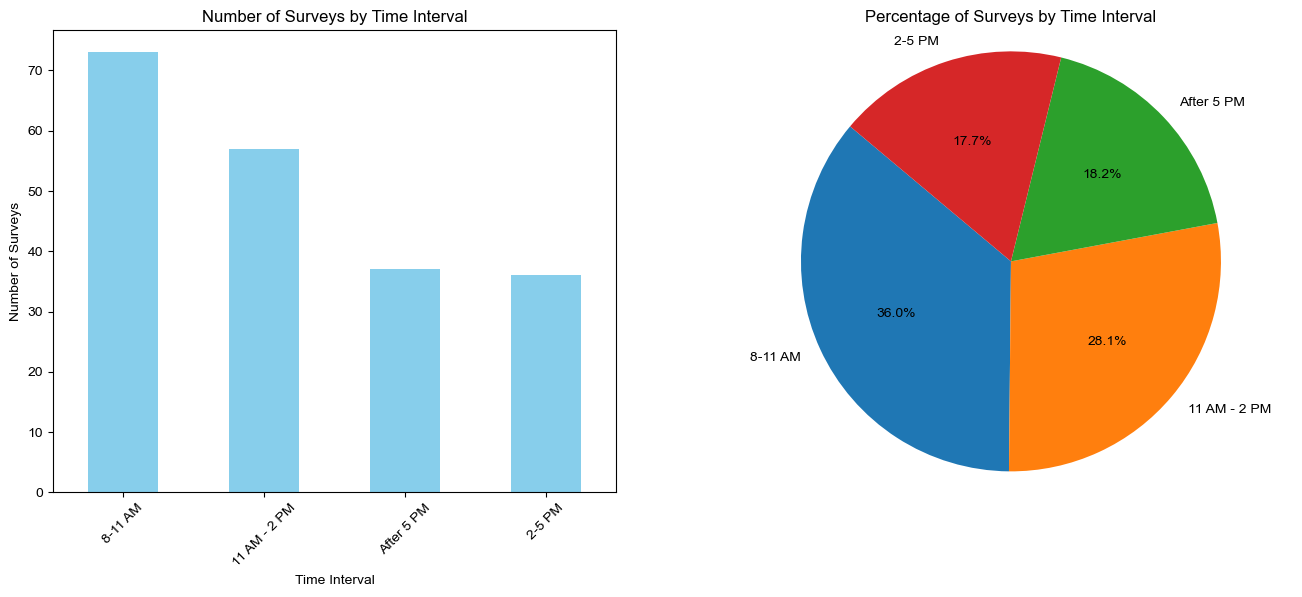

In [278]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Define time intervals
time_intervals = [(8, 11), (11, 14), (14, 17), (17, 20)]

# Create labels for time intervals
labels = ['8-11 AM', '11 AM - 2 PM', '2-5 PM', 'After 5 PM']

# Categorize timestamps into time intervals
def categorize_time(timestamp):
    hour = timestamp.hour
    for interval, label in zip(time_intervals, labels):
        if interval[0] <= hour < interval[1]:
            return label
    return 'After 5 PM'

df['Time Interval'] = df['Timestamp'].apply(categorize_time)

# Calculate value counts for each time interval
value_counts = df['Time Interval'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

value_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Number of Surveys by Time Interval')
axes[0].set_xlabel('Time Interval')
axes[0].set_ylabel('Number of Surveys')
axes[0].tick_params(axis='x', rotation=45)

# Plot pie chart
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage of Surveys by Time Interval')
axes[1].axis('equal')

plt.show()

In [279]:

df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Time stamp time']=pd.to_datetime(df['Time stamp time'])
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))
# pd.to_datetime(df['Start time of survey']).strftime('%H:%M:%S')

df['Time stamp time']-df['Start time of survey']

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

### Gender proportions in the sample

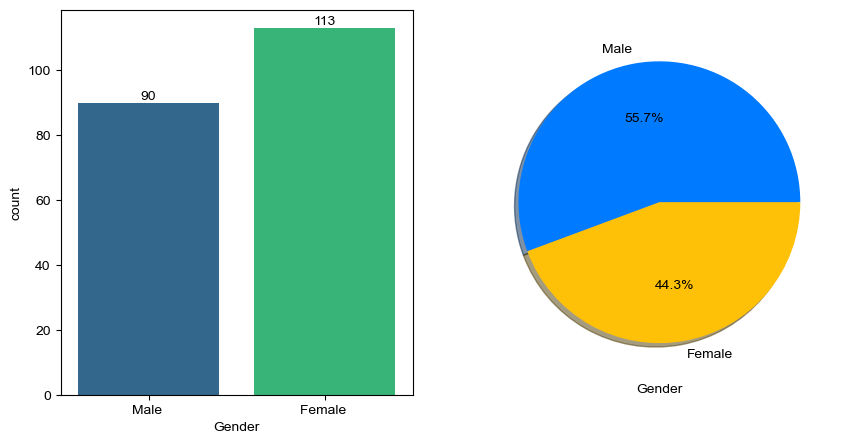

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.countplot(x=df['17'],data=df,palette='viridis',ax=ax[0],saturation=0.95)
ax[0].xaxis.set_label_text('Gender')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
plt.pie(x=df['17'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['#007bff','#ffc107'])
plt.xlabel('Gender')
plt.show()

### Different Age groups covered in the sample

(-1.099997689023834,
 1.099999889953516,
 -1.0999954616912038,
 1.0999969800638922)

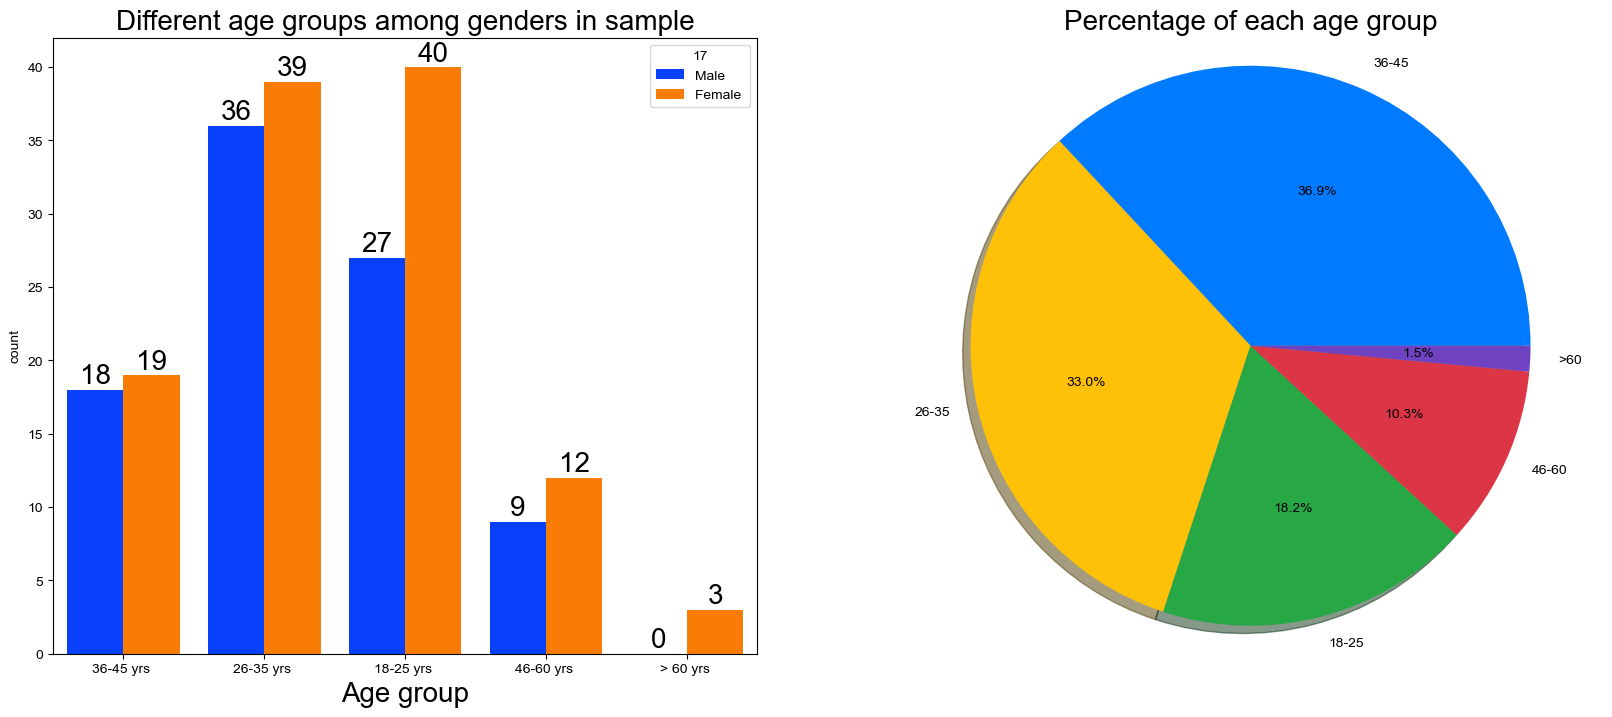

In [ ]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['18'],data=df,palette = 'bright',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Age group',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.subplot(1, 2, 2)
plt.pie(x=df['18'].value_counts(), labels=['36-45', '26-35', '18-25', '46-60', '>60'], autopct='%1.1f%%', shadow=True,
         colors = ['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])
plt.title('Percentage of each age group', size=20)
plt.axis('equal') 

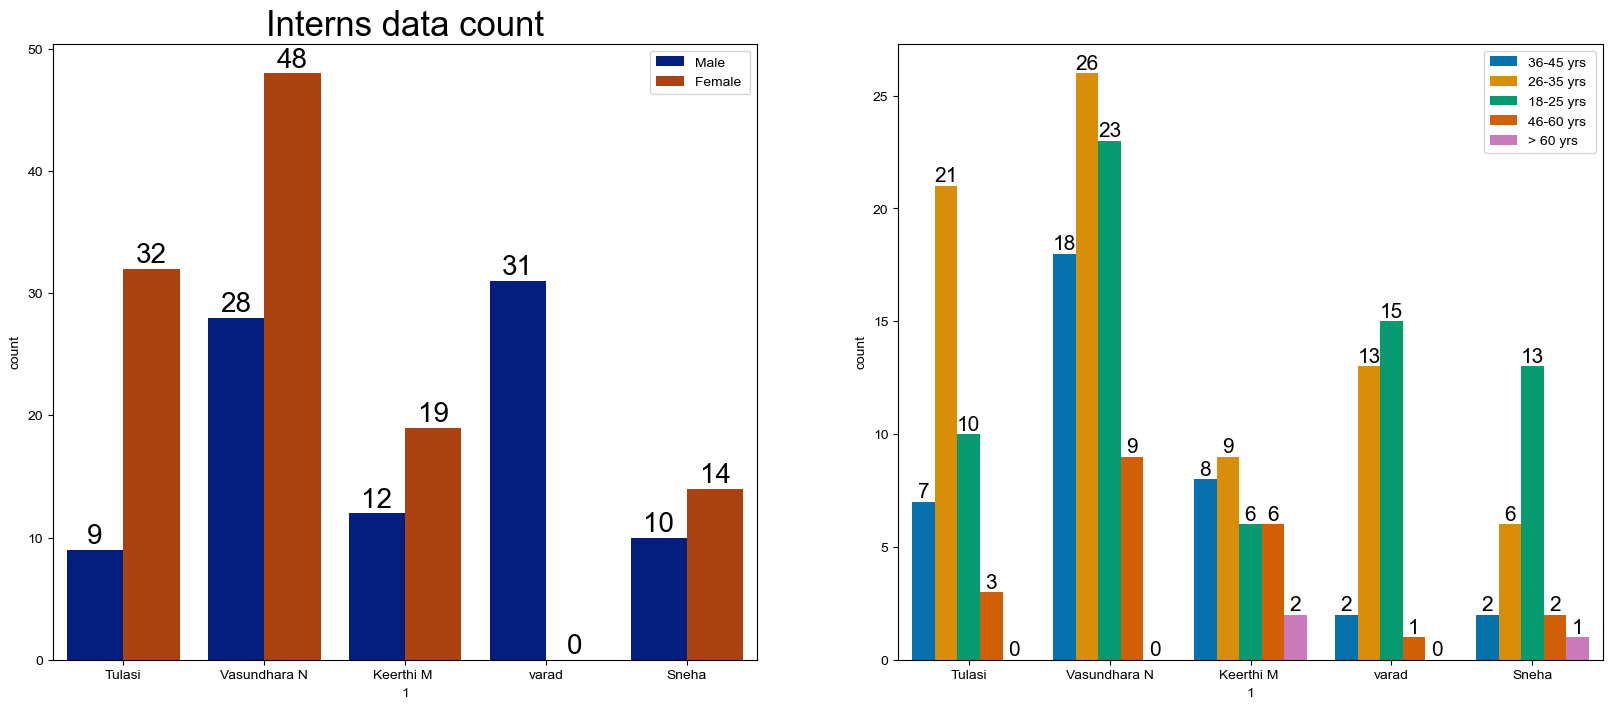

In [ ]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['1'],data=df,palette = 'dark',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Interns data count',color='black',size=25)
ax[0].legend()
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['1'],data=df,palette = 'colorblind',hue='18',saturation=0.95,ax=ax[1])
ax[1].legend()
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   


In [ ]:
# pd.to_timedelta(df['Start time of survey'])
# strip the date from this format of Timestamp column 01-05-2024 08:28 and keep only time 



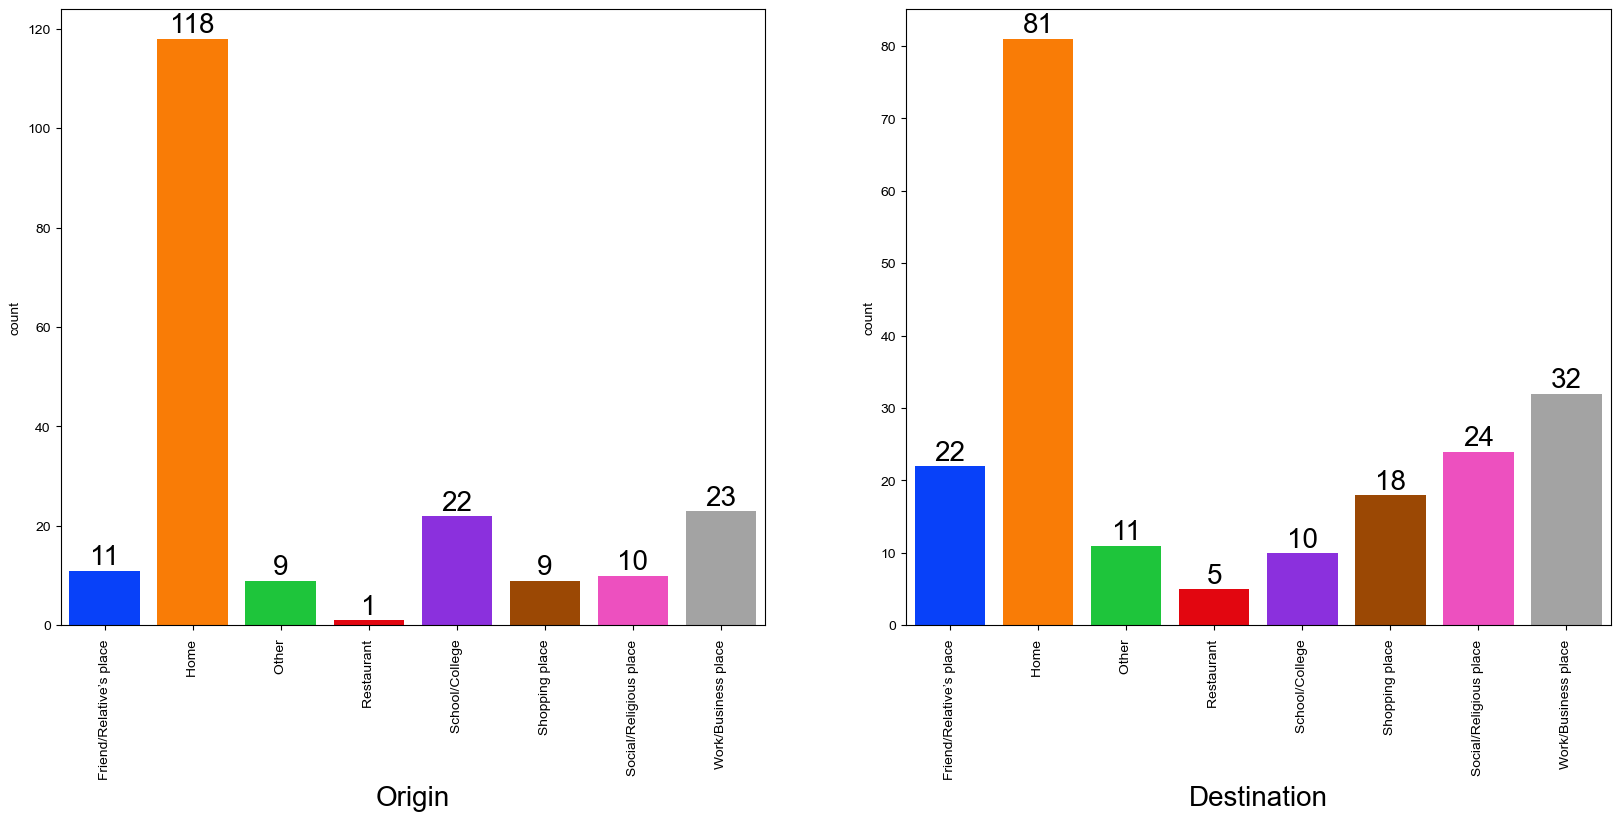

In [ ]:
df_sorted_origin = df.sort_values(by='6')
df_sorted_destination = df.sort_values(by='4')

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x=df_sorted_origin['6'], data=df_sorted_origin, palette='bright', saturation=0.95, ax=ax[0])
# ax[0].set_title('Value counts of origin types', color='black', size=20)
ax[0].xaxis.set_label_text('Origin', size=20)
ax[0].tick_params(axis='x', rotation=90)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['4'], data=df_sorted_destination, palette='bright', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Destination', size=20)
ax[1].tick_params(axis='x', rotation=90)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

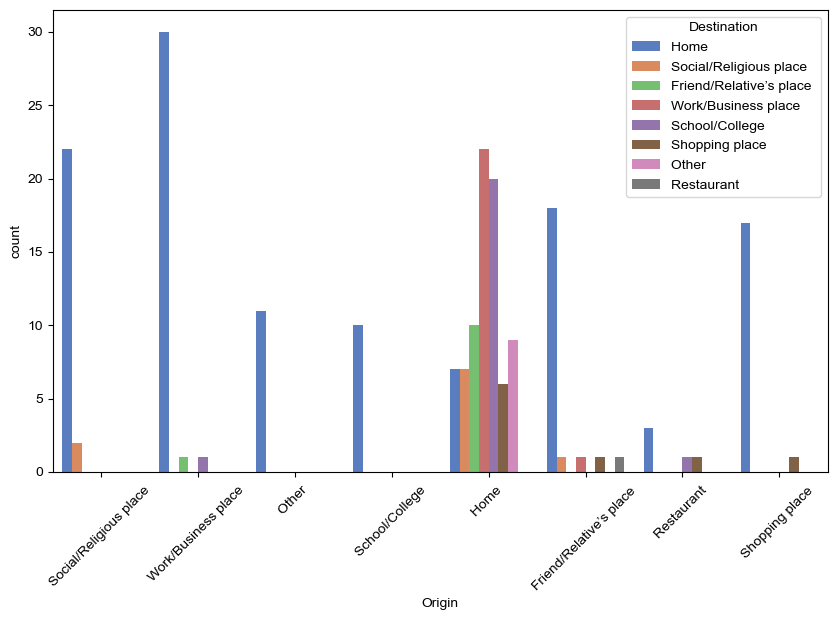

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='4', hue='6', data=df, palette='muted')
# plt.title('Clustered Bar Chart of Two Categorical Columns')
plt.xlabel('Origin')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()


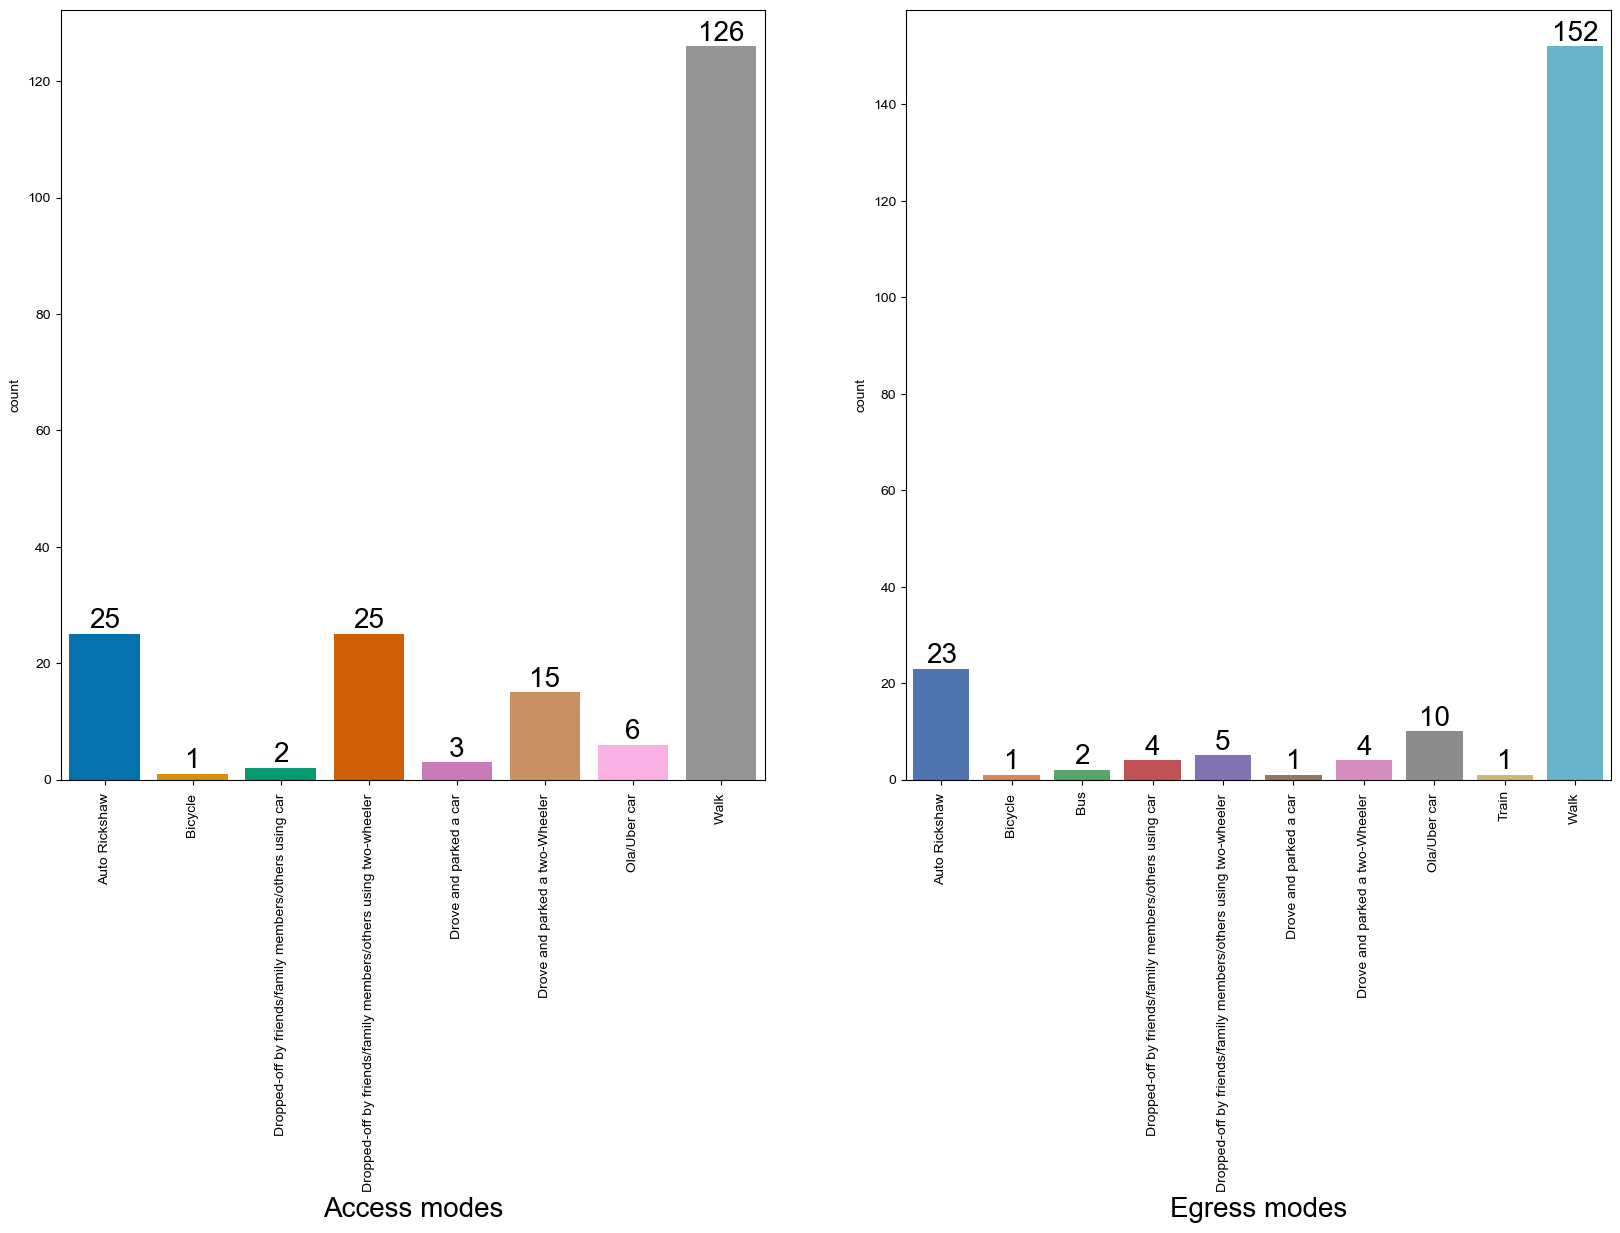

In [ ]:
df_sorted_origin = df.sort_values(by='10')
df_sorted_destination = df.sort_values(by='11')

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for origin types
sns.countplot(x=df_sorted_origin['10'], data=df_sorted_origin, palette='colorblind', saturation=0.95, ax=ax[0])
# ax[0].set_title('Value counts of origin types', color='black', size=20)
ax[0].xaxis.set_label_text('Access modes', size=20)
ax[0].tick_params(axis='x', rotation=90)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['11'], data=df_sorted_destination, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Egress modes', size=20)
ax[1].tick_params(axis='x', rotation=90)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

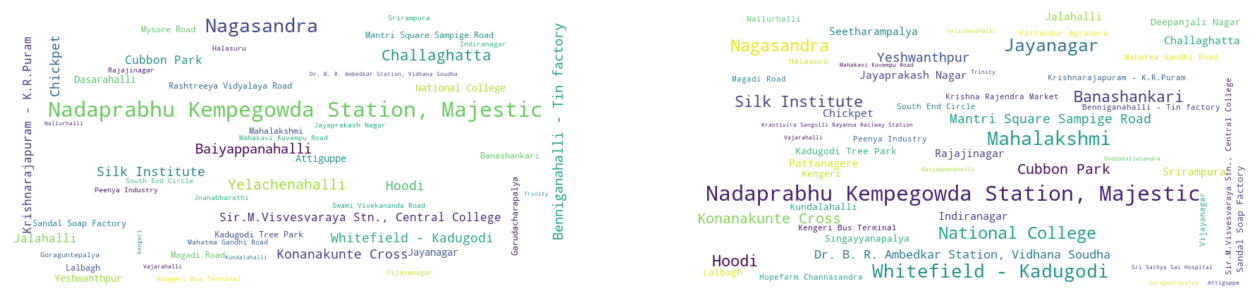

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Value counts and word cloud for first column '2c'
value_counts_2c = df['2c'].value_counts()
wordcloud_2c = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2c)
axs[0].imshow(wordcloud_2c, interpolation='bilinear')
axs[0].axis('off')


# Value counts and word cloud for second column '2d'
value_counts_2d = df['2d'].value_counts()
wordcloud_2d = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2d)
axs[1].imshow(wordcloud_2d, interpolation='bilinear')
axs[1].axis('off')


# Display the subplots
plt.show()


In [ ]:
# Get value counts for column '2c'
value_counts_2c = df['2c'].value_counts()

# Get value counts for column '2d'
value_counts_2d = df['2d'].value_counts()

# Combine the value counts for both columns
combined_value_counts = value_counts_2c.add(value_counts_2d, fill_value=0)

combined_value_counts = combined_value_counts.astype(int)

# Sort the combined value counts in descending order
combined_value_counts_sorted = combined_value_counts.sort_values(ascending=False)

# Display the combined value counts
print(combined_value_counts_sorted)


Nadaprabhu Kempegowda Station, Majestic         35
Nagasandra                                      25
Whitefield - Kadugodi                           16
Mahalakshmi                                     14
Hoodi                                           13
Challaghatta                                    13
Silk Institute                                  13
Jayanagar                                       13
Konanakunte Cross                               12
National College                                12
Cubbon Park                                     11
Banashankari                                    10
Chickpet                                        10
Jalahalli                                        9
Yeshwanthpur                                     9
Yelachenahalli                                   9
Benniganahalli - Tin factory                     9
Mantri Square Sampige Road                       8
Baiyappanahalli                                  8
Sir.M.Visvesvaraya Stn., Centra

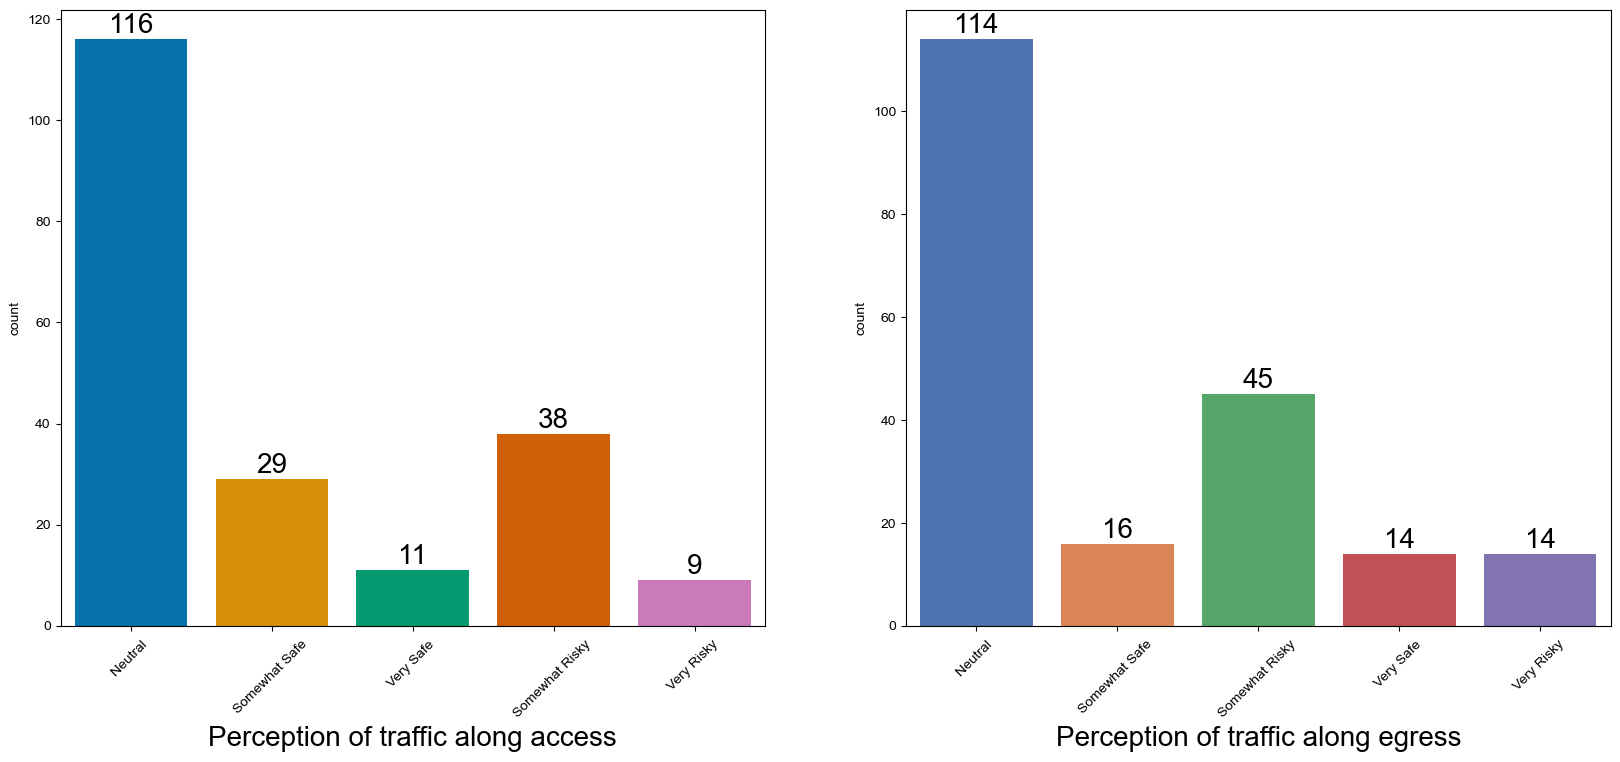

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x='12a', data=df, palette='colorblind', saturation=0.95, ax=ax[0])
# ax[0].set_title('Perception of traffic along access', color='black', size=20)
ax[0].xaxis.set_label_text('Perception of traffic along access', size=20)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x='12b', data=df, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Perception of traffic along egress', size=20)
# ax[1].set_title('', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

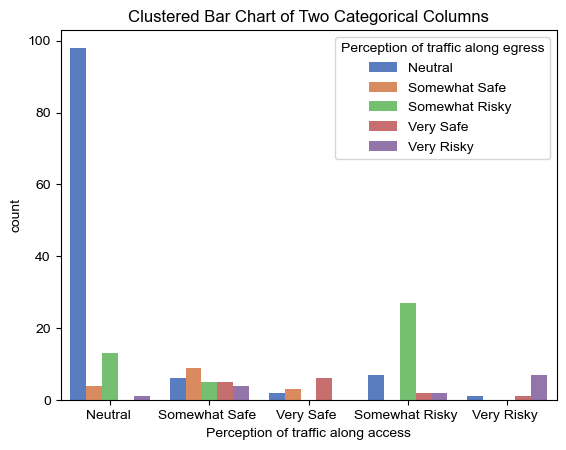

In [ ]:
sns.countplot(x='12a', hue='12b', data=df, palette='muted')
plt.title('Clustered Bar Chart of Two Categorical Columns')
plt.xlabel('Perception of traffic along access')
plt.legend(title='Perception of traffic along egress')
plt.show()

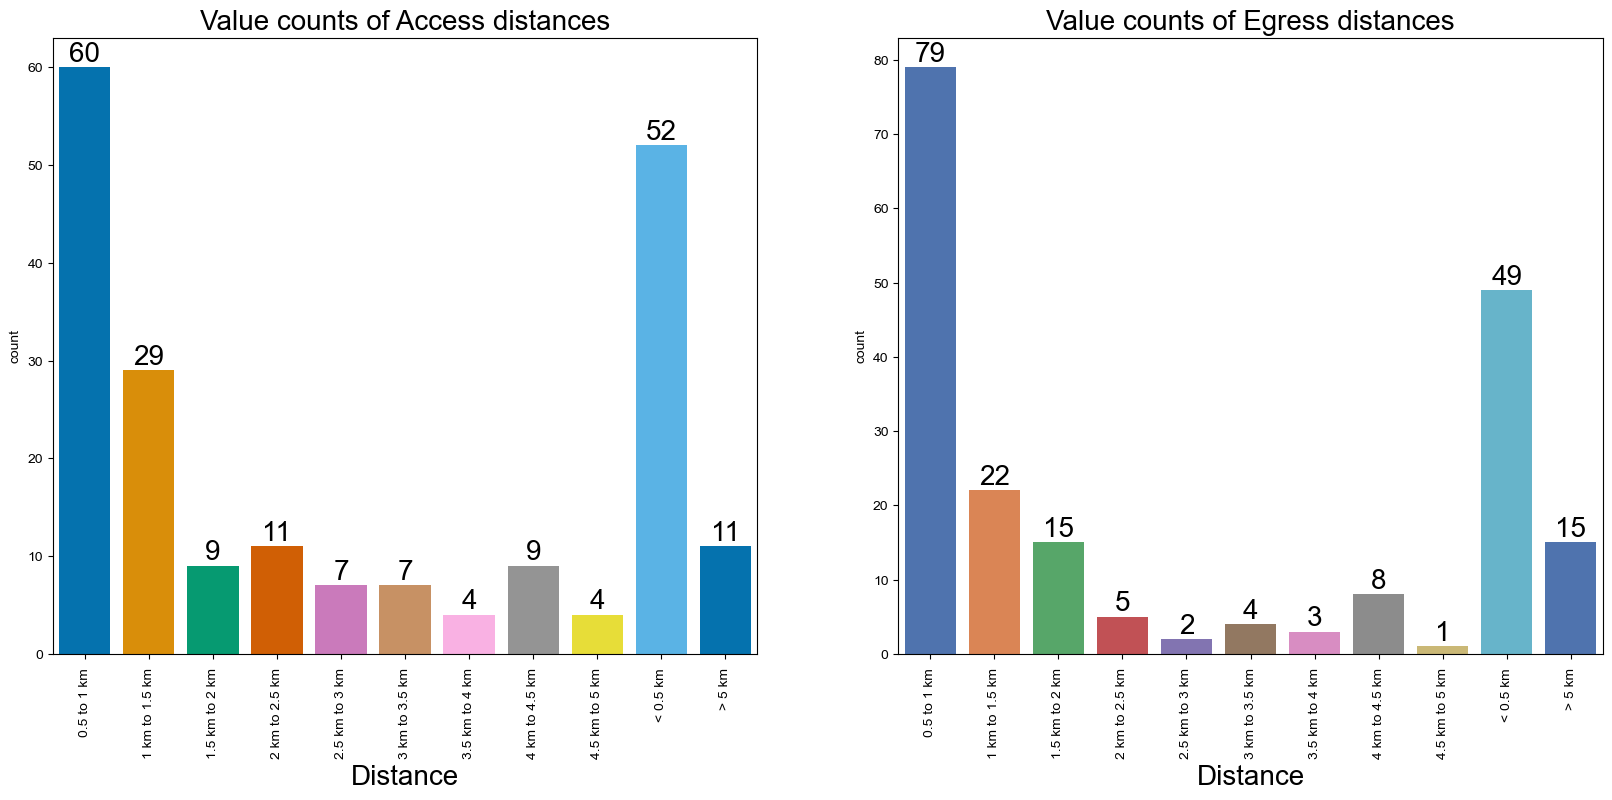

In [ ]:
df_sorted_origin = df.sort_values(by='10b')
df_sorted_destination = df.sort_values(by='11b')

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x=df_sorted_origin['10b'], data=df_sorted_origin, palette='colorblind', saturation=0.95, ax=ax[0])
ax[0].set_title('Value counts of Access distances', color='black', size=20)
ax[0].xaxis.set_label_text('Distance', size=20)
ax[0].tick_params(axis='x', rotation=90)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['11b'], data=df_sorted_destination, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Distance', size=20)
ax[1].set_title('Value counts of Egress distances', color='black', size=20)
ax[1].tick_params(axis='x', rotation=90)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()